In [1]:
import sys
sys.path.append("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")

In [2]:
import pandas as pd
import gower
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import pandas as pd
import gower
import numpy as np
from collections import Counter
from similar_plays import find_similar_scenarios, recommend_play
import matplotlib.pyplot as plt
from stats import *
from flask import Flask, request, jsonify


In [3]:
df = pd.read_csv("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/data/plays.csv", index_col=0)
request_data = {
    "away_team": "ATL",
    "defensiveTeam": "ATL",
    "down": "3",
    "gameClock_minutes": "10",
    "gameClock_seconds": "15",
    "home_team": "SF",
    "offensiveTeam": "SF",
    "preSnapHomeScore": "7",
    "preSnapVisitorScore": "5",
    "quarter": "1",
    "yardlineNumber": "50",
    "yardsToGo": "45"
  }
offensive_team = request_data["offensiveTeam"]
defensive_team = request_data["defensiveTeam"]

    
similar_df, similar_df_specified, similar_df_defensive = produce_dataframes(df, offensive_team, defensive_team, request_data)


/var/folders/_j/bztmn43s0h9563f510vwl2wm0000gn/T/ipykernel_54249/2571179954.py:1: DtypeWarning: Columns (37,38,50,180,181,183,184,190,191,194,195,196,197,206,207,208,209,210,211,212,213,214,215,219,220,221,234,235,236,237,238,239,249,250,254,255,256,261,263,264,267,268,269,270,284,285,293,294,295,296,297,300,302,303,304,373,374,375,376,378,380,381,382) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/data/plays.csv", index_col=0)
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  play[col] = np.nan
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:30: PerformanceWa

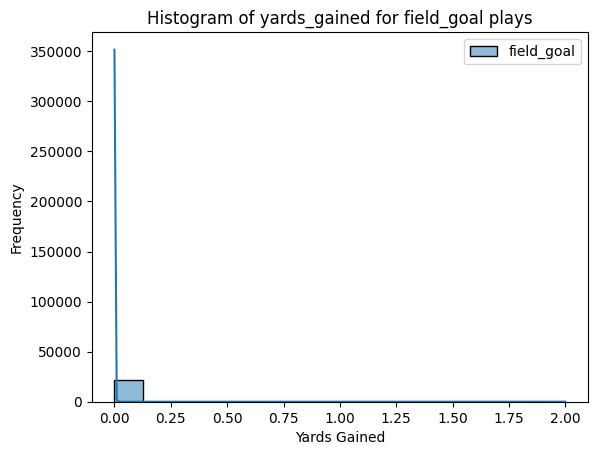

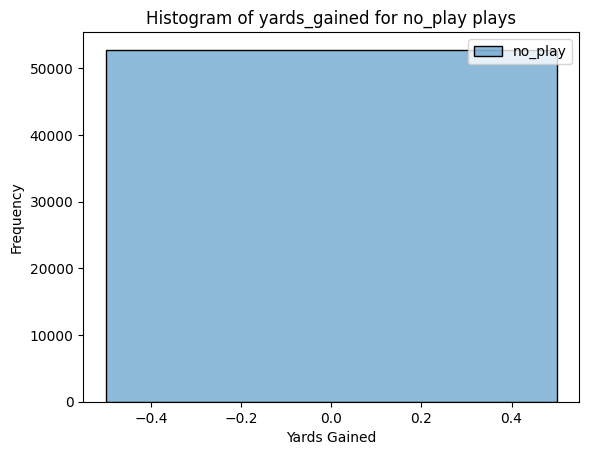

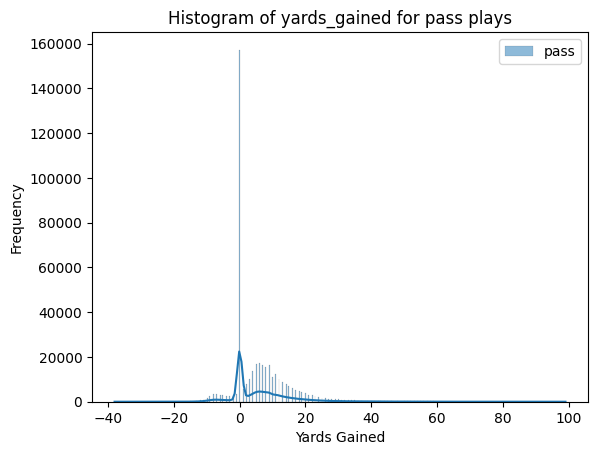

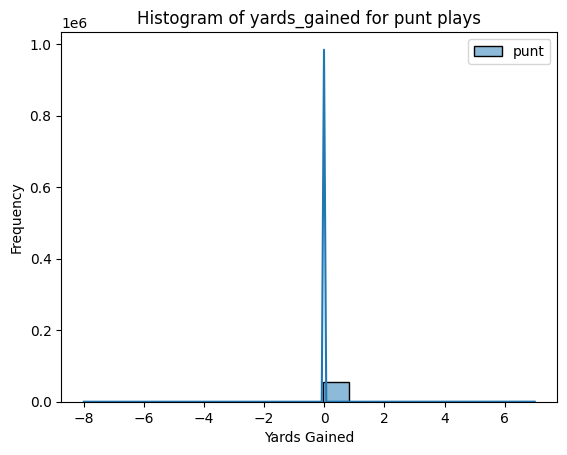

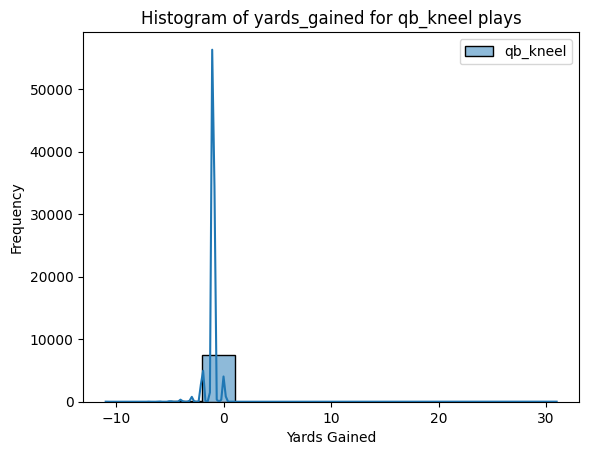

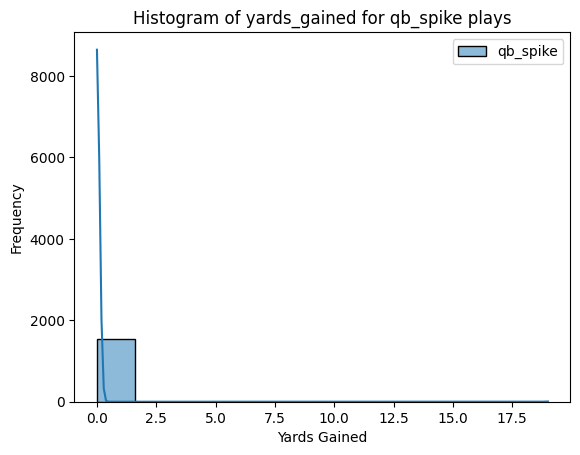

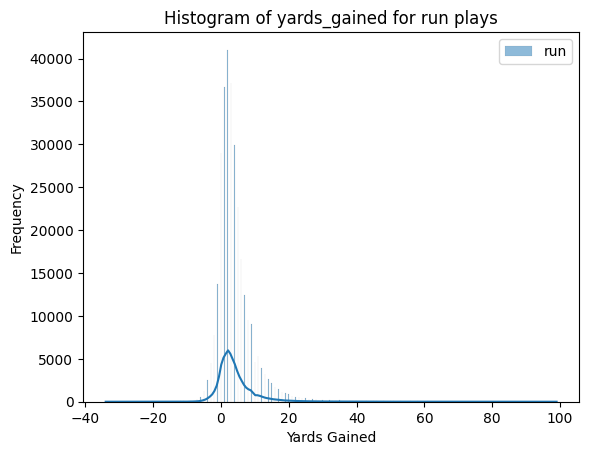

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for play_type, group in df.groupby('play_type'):
    sns.histplot(group['yards_gained'], kde=True, label=str(play_type))
    plt.title(f'Histogram of yards_gained for {play_type} plays')
    plt.xlabel('Yards Gained')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


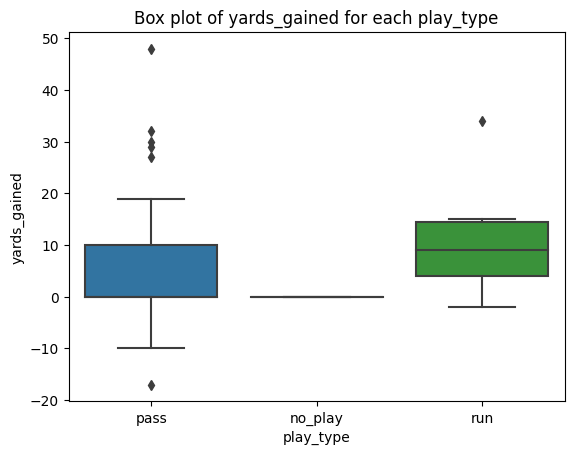

In [5]:
sns.boxplot(x='play_type', y='yards_gained', data=similar_df)
plt.title('Box plot of yards_gained for each play_type')
plt.show()


/var/folders/_j/bztmn43s0h9563f510vwl2wm0000gn/T/ipykernel_54249/3268294433.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group['yards_gained'], label=str(play_type))


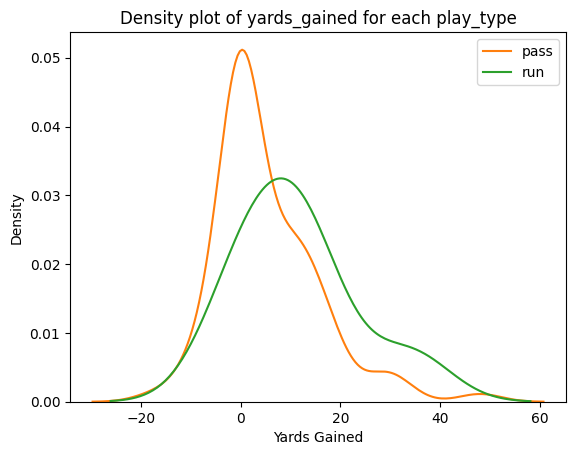

In [6]:
for play_type, group in similar_df.groupby('play_type'):
    sns.kdeplot(group['yards_gained'], label=str(play_type))
plt.title('Density plot of yards_gained for each play_type')
plt.xlabel('Yards Gained')
plt.ylabel('Density')
plt.legend()
plt.show()


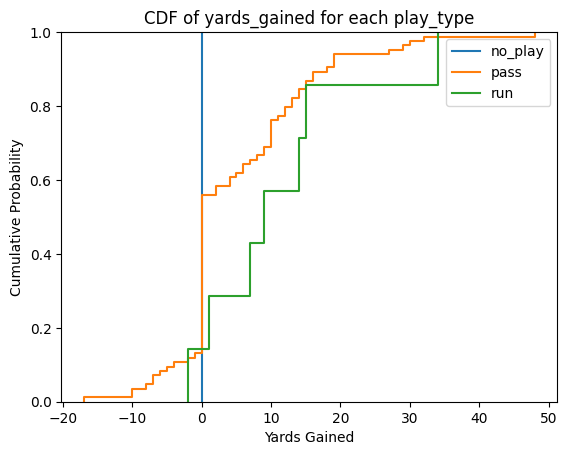

In [7]:
for play_type, group in similar_df.groupby('play_type'):
    sns.ecdfplot(group['yards_gained'], label=str(play_type))
plt.title('CDF of yards_gained for each play_type')
plt.xlabel('Yards Gained')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()


/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["gower_similarity"] = values[1:]
/var/folders/_j/bztmn43s0h9563f510vwl2wm0000gn/T/ipykernel_54249/2015972579.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group['yards_gained'], label=str(play_type))
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

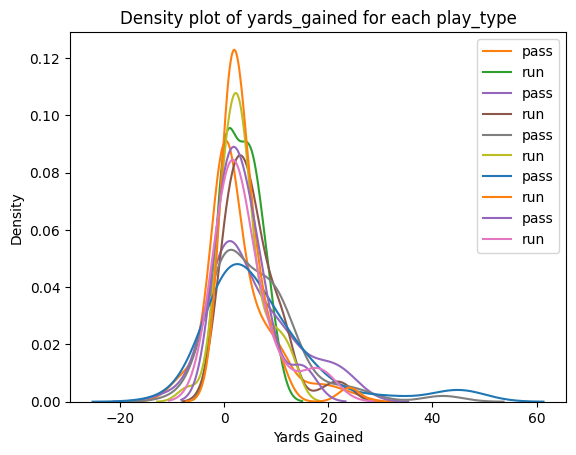

In [10]:
for i in range(5):
    sample_df = find_similar_scenarios(df, df.sample(1).iloc[0],  100)
    for play_type, group in sample_df.groupby('play_type'):
        sns.kdeplot(group['yards_gained'], label=str(play_type))
    plt.title('Density plot of yards_gained for each play_type')
    plt.xlabel('Yards Gained')
    plt.ylabel('Density')
    plt.legend()




/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["gower_similarity"] = values[1:]
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["gower_similarity"] = values[1:]
/var/folders/_j/bztmn43s0h9563f510vwl2wm0000gn/T/ipykernel_54249/778698517.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts the subplots to fit 

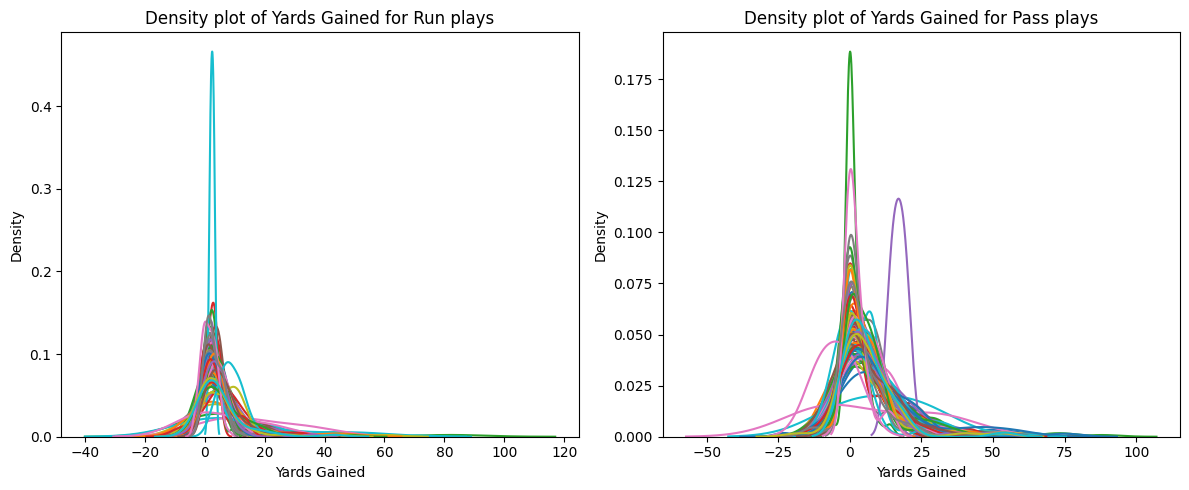

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Adjust the figsize as needed

# Assuming find_similar_scenarios is a function that returns a DataFrame
for i in range(100):
    # Sample a scenario and find similar scenarios
    sample_df = find_similar_scenarios(df, df.sample(1).iloc[0], 100)

    

    # Plot for "run" plays on the first subplot
    sns.kdeplot(sample_df[sample_df['play_type'] == 'run']['yards_gained'], ax=axs[0], label='Run')
    axs[0].set_title(f'Density plot of Yards Gained for Run plays')
    axs[0].set_xlabel('Yards Gained')
    axs[0].set_ylabel('Density')


    # Plot for "pass" plays on the second subplot
    sns.kdeplot(sample_df[sample_df['play_type'] == 'pass']['yards_gained'], ax=axs[1], label='Pass')
    axs[1].set_title(f'Density plot of Yards Gained for Pass plays')
    axs[1].set_xlabel('Yards Gained')
    axs[1].set_ylabel('Density')

    plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
